# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


### Решение

In [576]:
# Взяла датасет данные приложений из Google Play
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gdstore = pd.read_csv('googleplaystore.csv')
reviews = pd.read_csv('googleplaystore_user_reviews.csv')

gdstore.info()
gdstore.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [577]:
# Для основного фрейма переименовываем колонки с пробелами, чтоб не мешали
gdstore.rename(columns={"Content Rating": "Content_Rating", "Last Updated": "Last_Updated", "Current Ver":"Current_V", "Android Ver":"Android_V"}, inplace = True)
gdstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_V       10833 non-null  object 
 12  Android_V       10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [578]:
# Из отзывов удаляем строки без инфо
reviews = reviews[~reviews.Sentiment.isna()]
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37432 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37432 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [579]:
# Смотрим в Installs приложений. Можно привести к инту, Заодно находим косяки в данных.
# Одна запись с Installs == free явно со съехавшими колонками из-за отсутствия категории. Поправляем строку
gdstore['Installs'].value_counts()
gdstore.loc[gdstore.Installs == 'Free','Category'] = 'PHOTOGRAPHY'
gdstore.loc[gdstore.Installs == 'Free','Rating'] = 1.9
gdstore.loc[gdstore.Installs == 'Free','Reviews'] = 19.0
gdstore.loc[gdstore.Installs == 'Free','Size'] = '3.0M'
gdstore.loc[gdstore.Installs == 'Free','Type'] = 'Free'
gdstore.loc[gdstore.Installs == 'Free','Price'] = 0
gdstore.loc[gdstore.Installs == 'Free','Content_Rating'] = 'Everyone'
gdstore.loc[gdstore.Installs == 'Free','Genres'] = None
gdstore.loc[gdstore.Installs == 'Free','Last_Updated'] = 'February 11, 2018'
gdstore.loc[gdstore.Installs == 'Free','Current_V'] = '1.0.19'
gdstore.loc[gdstore.Installs == 'Free','Android_V'] = '4.0 and up'
gdstore.loc[gdstore.Installs == 'Free','Installs'] = '1,000+'

In [580]:
# Посмотрим что лежит в размере, приведем к инту в мб
gdstore[~gdstore.Size.str.contains(r'M|k')]['Size'].value_counts()
gdstore.loc[gdstore.Size == 'Varies with device','Size'] = '0'
gdstore.loc[gdstore.Size.str.contains('M'),'Size'] = gdstore.Size.str.replace(r'\D', '', regex=True)
gdstore.loc[gdstore.Size.str.contains('k'),'Size'] = '1' # грубовато, но в сравнении с общей массой не так существенно


In [581]:
# Таки приводим к инту
# И количество оценок тоже
gdstore['Installs'] = gdstore.Installs.str.replace(r'\D', '', regex=True)
gdstore = gdstore.astype({'Installs': 'int', 'Reviews':'int', 'Size':'float'})

In [464]:
# Смотрим в остальные категориальные значения
gdstore['Type'].value_counts()
gdstore['Genres'].value_counts()
gdstore['Category'].value_counts()
gdstore['Content_Rating'].value_counts()
# Выравниваем данные для Content_Rating
gdstore.loc[gdstore.Content_Rating == 'Unrated','Content_Rating'] = 'Everyone'

Text(0, 0.5, 'Средний рейтинг')

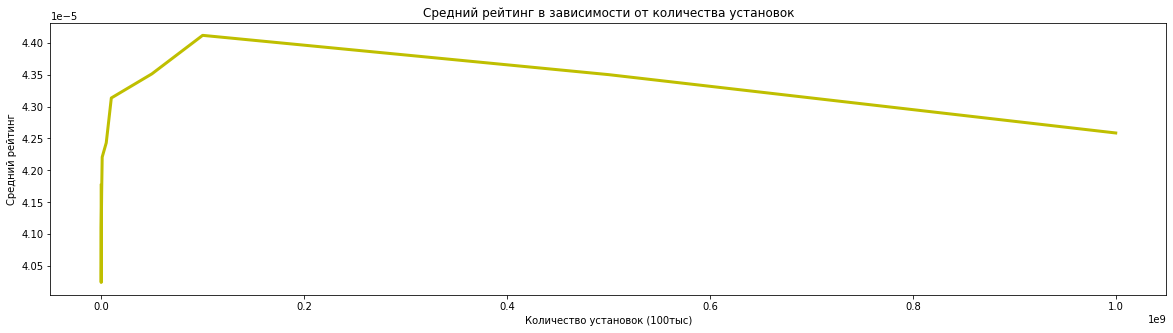

In [466]:
plt.rcParams["figure.figsize"] = (20,5)
# убрала установленные менее 500 раз
review_by_installs = gdstore[gdstore.Installs >= 500][['Installs', 'Rating']].groupby('Installs')['Rating'].agg('mean').reset_index()

plt.plot(review_by_installs.Installs, (review_by_installs.Rating / 100000), '-y', linewidth=3)
plt.title('Средний рейтинг в зависимости от количества установок')
plt.xlabel('Количество установок (100тыс)')
plt.ylabel('Средний рейтинг')

# Вывод - Чем больше пользователей выше "медианного" значения - тем чуть ниже оценка

<AxesSubplot:title={'center':'Средние рейтинги топ 10 по установкам категорий и их связь с кол-вом установок '}, xlabel='Рейтинг', ylabel='Установки'>

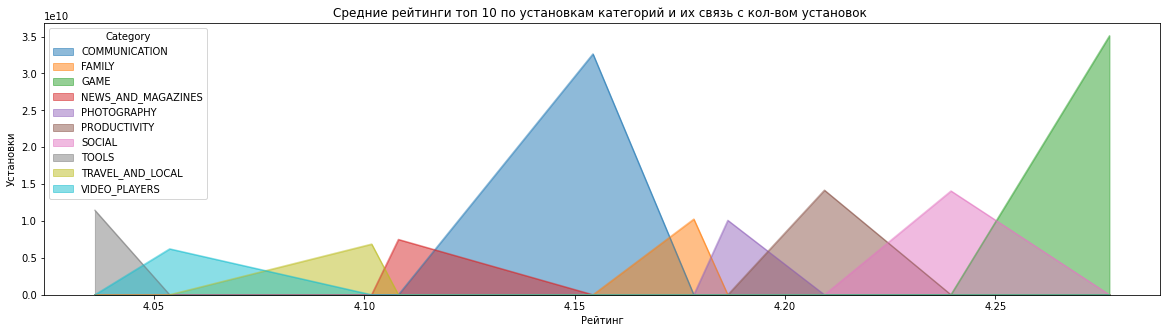

In [467]:
top_categories = gdstore[gdstore.Installs >= 500][['Category', 'Rating']].groupby('Category')['Rating'].agg('mean').reset_index().merge(gdstore[['Category', 'Installs']].groupby('Category').sum().sort_values('Installs', ascending=False).head(10),how='inner', on='Category').drop_duplicates()

top_categories[['Category', 'Rating', 'Installs']].pivot_table(
                        index='Rating', 
                        columns='Category', 
                        values='Installs',
                        aggfunc='mean').fillna(0).plot(kind='area',
                             stacked=False,
                             title='Средние рейтинги топ 10 по установкам категорий и их связь с кол-вом установок ', 
                             xlabel='Рейтинг', 
                             ylabel='Установки')
# Вывод - наиболее популярная категория имеет наиболее средний на выборке рейтинг

<AxesSubplot:title={'center':'Распределение назначения бесплатных приложений по возрастным группам'}, ylabel='Content_Rating'>

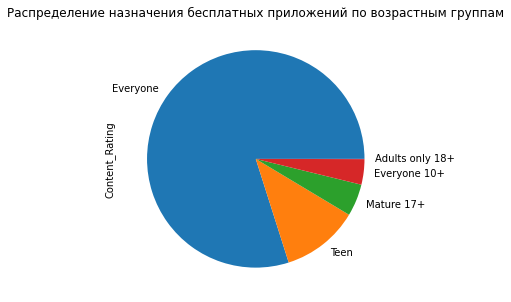

In [468]:
plt.rcParams["figure.figsize"] = (20,5)
gdstore[gdstore.Type == 'Free'].Content_Rating.value_counts().plot(kind='pie', title='Распределение назначения бесплатных приложений по возрастным группам')
# Вывод - Наибольший сегмент не имеет возрастных ограничений, наименьший - 18+

<AxesSubplot:title={'center':'Распределение оценок пользователей'}, ylabel='Frequency'>

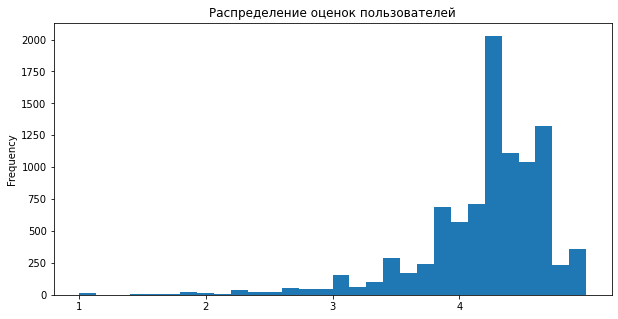

In [492]:
gdstore.Rating.plot(kind='hist', 
                   bins=30,
                   title='Распределение оценок пользователей',
                   xlabel='Рейтинг',
                   ylabel='Количество',
                   xticks=range(1, 5))
# Вывод - Распределение оценок пользователей не сильно смещено от нормального, пик приходится на оценку чуть меньшую, чем максимальная

In [470]:
# Посмотрим на длину комментария к оценке
reviews['Translated_len'] = reviews.Translated_Review.apply(lambda x: len(str(x)))
reviews.Translated_len.describe()
# т.к. много вариантов - категорируем
def len_cat(x):
    if x < 25:
        return 'very small'
    elif x < 50:
        return 'small'
    elif x < 250:
        return 'medium'
    elif x < 500:
        return 'large'
    else:
        return 'very large'
reviews['Translated_len_cat'] = reviews.Translated_len.apply(lambda x: len_cat(x))

<AxesSubplot:xlabel='Translated_len_cat'>

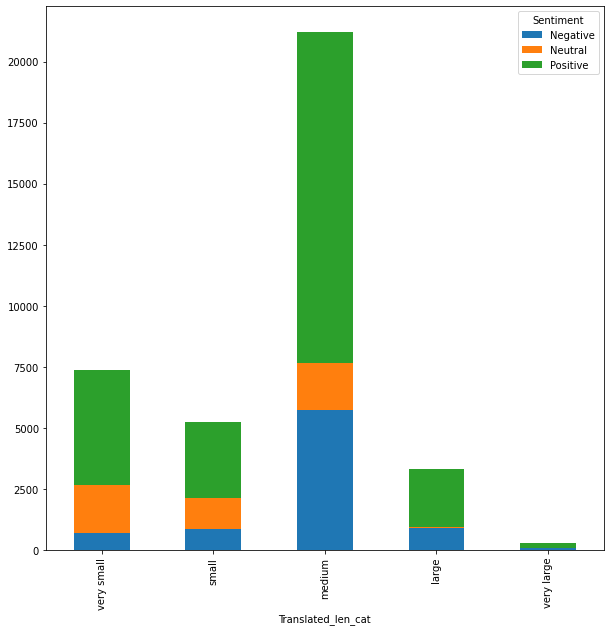

In [472]:
reviews_len_by_sent = reviews[['App', 'Sentiment','Translated_len_cat']].pivot_table(
                        index='Translated_len_cat', 
                        columns='Sentiment', 
                        values='App',
                        aggfunc='count').fillna(0)
plt.rcParams["figure.figsize"] = (10,10)
reviews_len_by_sent.loc[["very small", "small", "medium", "large", "very large"]].plot(kind="bar", stacked=True)
# Вывод - Большая часть людей оставляет отзывы средней длины, большая из оставшихся - малой. Доля нейтральных отзывов наименьшая, но чаще встречается в коротких отзывах

<AxesSubplot:title={'center':'Разброс длинны отзыва'}>

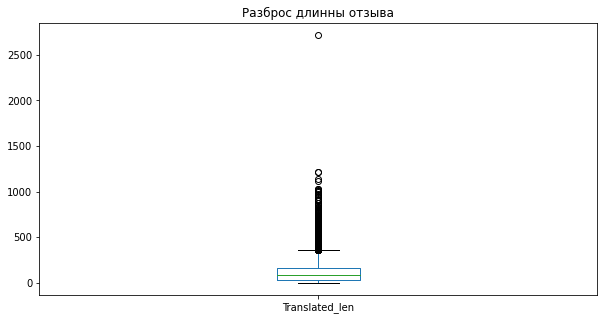

In [524]:
plt.rcParams["figure.figsize"] = (10,5)
# Посмотрим выбросы в длине отзыва и средних оценках
reviews.Translated_len.plot(kind='box', title='Разброс длинны отзыва')
# Вывод - Короткая перцентильная длина, порождающая сильные/дальние выбросы, которые не являются ошибками

<AxesSubplot:title={'center':'Разброс длинны отзыва'}>

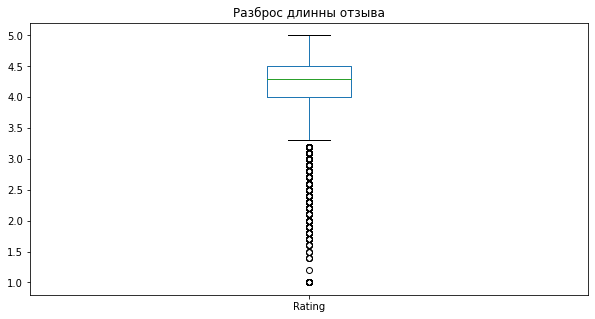

In [485]:
gdstore.Rating.plot(kind='box', title='Разброс длинны отзыва')
# Вывод - Аналогично боксу выше, но менее ярко выраженное

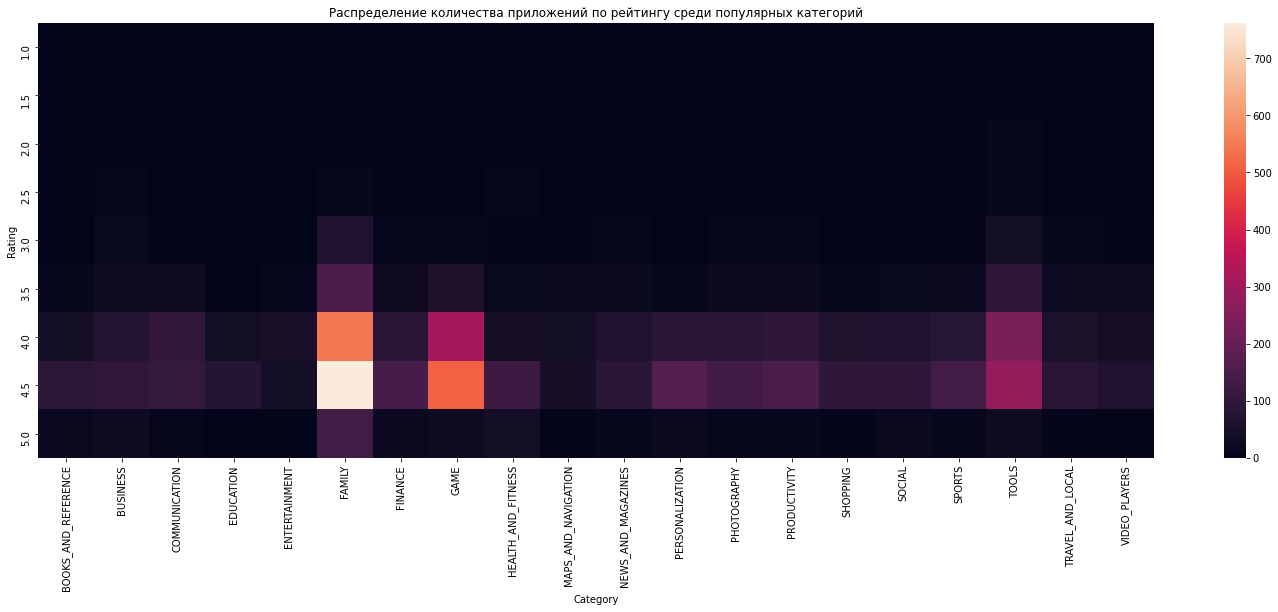

In [521]:
# Посмотрим распределение количества приложений по рейтингу среди популярных категорий
plt.rcParams["figure.figsize"] = (25,8)
top_categories = gdstore[['Category', 'Rating', 'App']].merge(gdstore[['Category', 'Installs']].groupby('Category').sum().sort_values('Installs', ascending=False).head(20),how='inner', on='Category').drop_duplicates()
# Округлим оценку до 0.5
top_categories['Rating'] = 0.5*round(top_categories['Rating']/0.5)
top_categories = top_categories.pivot_table(
                        index='Rating', 
                        columns='Category', 
                        values='App', 
                        aggfunc='count').fillna(0)
ax = plt.axes()
sns.heatmap(top_categories, ax = ax)

ax.set_title('Распределение количества приложений по рейтингу среди популярных категорий')
ax.xlabel = 'Категория приложения'
ax.ylabel = 'Усредненный рейтинг приложения'
plt.show()
# Вывод - Видно самый топ - категории Семья и Игры и Инструменты, а так же явное распределение оценок в р-не 4.5

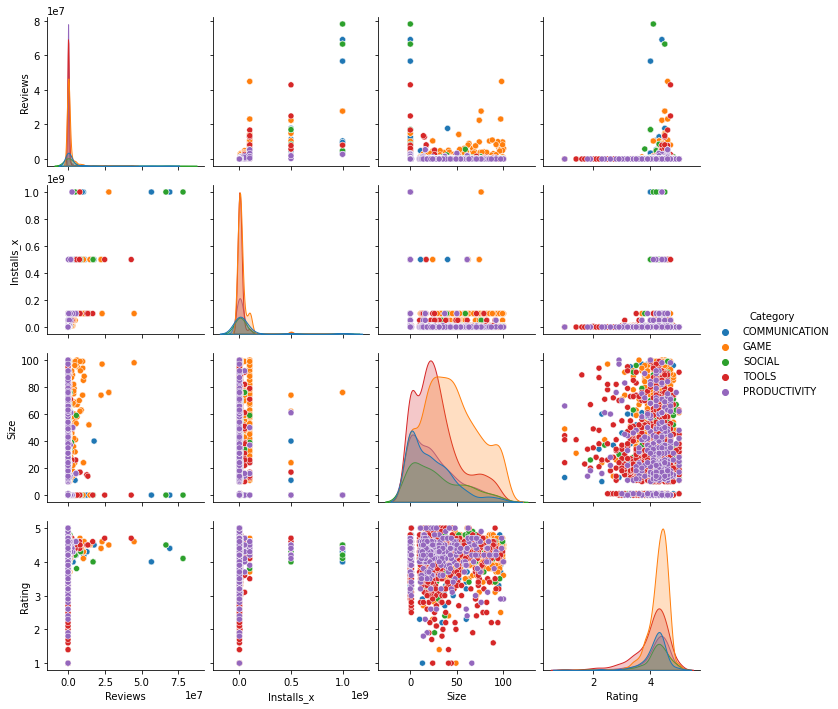

In [598]:
plt.rcParams["figure.figsize"] = (50,50)
# Собираем кусочек фрейма для матрицы плотов
# На примере 5ти категорий будем смотреть корреляции/взаимосвязи 4х измеримых атрибутов
top_categories = gdstore[['Category', 'Reviews', 'Size', 'Rating', 'Installs']].merge(gdstore[['Category', 'Installs']].groupby('Category').sum().sort_values('Installs', ascending=False).head(5),how='inner', on='Category').drop_duplicates()
top_categories

sns.pairplot(top_categories, hue='Category', vars=['Reviews', 'Installs_x', 'Size', 'Rating'])  

plt.show()
# Вывод - Более менее взаимосвязан только размер с рейтингом. У остальных особых пересечений/закономерностей нет.

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot(ящик с усами), heatmap(разноцветная плитка), scatter plot matrix(https://vitalflux.com/wp-content/uploads/2020/08/pairwise_scatter_plots_sklearn_iris_dataset.png);


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.